In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import PolynomialFeatures

### Importing the Dataset


In [4]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'

In [5]:
df = pd.read_csv(url,header = 0)

In [6]:
df.head(2)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.528,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.851,634,Low,1,0


In [8]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Manufacturer', 'Category', 'GPU', 'OS',
       'CPU_core', 'Screen_Size_inch', 'CPU_frequency', 'RAM_GB',
       'Storage_GB_SSD', 'Weight_pounds', 'Price', 'Price-binned',
       'Screen-Full_HD', 'Screen-IPS_panel'],
      dtype='object')

In [11]:
#dropping unnecessary columns Unnamed: 0.1,Unnamed: 0
df.drop(['Unnamed: 0.1', 'Unnamed: 0'],inplace = True)

KeyError: "['Unnamed: 0.1', 'Unnamed: 0'] not found in axis"

In [ ]:
#dropping unnecessary columns Unnamed: 0.1,Unnamed: 0
df.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis=1,inplace = True) # unnamed are column names , axis = 1 is vertical

In [10]:
df.head(2)

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.528,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.851,634,Low,1,0


#### Using Cross validation to improve the model

In [13]:
y_data = df['Price'] #accesing column price

In [16]:
x_data = df.drop('Price',axis=1) # all other columns except price

In [18]:
#splitting data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size= 0.10,random_state =1)
print("test smaples -",x_test.shape[0])
print('train samples-',x_train.shape[0])

test smaples - 24
train samples- 214


In [19]:
lm = LinearRegression()

In [20]:
lm.fit(x_train[['CPU_frequency']],y_train)
print(lm.score(x_test[['CPU_frequency']],y_test)) #r square errors
print(lm.score(x_train[['CPU_frequency']],y_train))

-0.06599437350393766
0.14829792099817973


In [23]:
# cross validation with 4 folds
scores = cross_val_score(lm,x_data[['CPU_frequency']],y_data,cv=4)
print("mea of scores-",scores.mean())
print("standard deviation of scores-",scores.std())

mea of scores- -0.16109232388595113
standard deviation of scores- 0.384957978666471


### Overfitting

In [25]:
x_train1 ,x_test1,y_train1,y_test1 = train_test_split(x_data,y_data,test_size = 0.5,random_state = 0)
print("test sample size-",x_test1.shape[0])
print("train sample size-",x_train1.shape[0])

test sample size- 119
train sample size- 119


In [30]:
lm2 = LinearRegression()# creating polynomial regresion features
rsqu_test = []
order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])
    lm2.fit(x_train_pr, y_train)
    rsqu_test.append(lm2.score(x_test_pr, y_test))

Text(0.5, 1.0, 'r2 using test data')

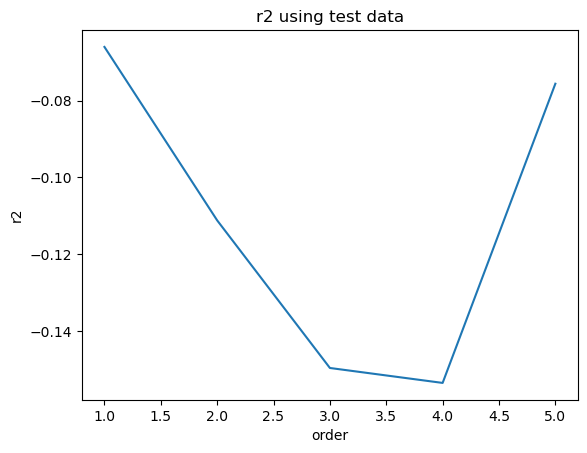

In [32]:
plt.plot(order,rsqu_test)
plt.xlabel("order")
plt.ylabel('r2')
plt.title('r2 using test data')


### Ridge Regression

In [33]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr=pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

In [36]:
from tqdm import tqdm


In [37]:
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)#tqdm creates progress bar

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|███| 999/999 [00:02<00:00, 350.09it/s, Test Score=0.371, Train Score=0.634]


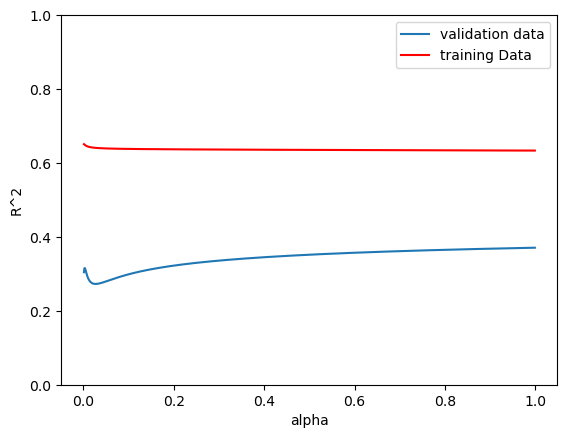

In [38]:
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()